In [1]:
nd <- read.csv("netflix_titles.csv")
.libPaths(c("R packages", .libPaths()))

Load necessary libraries
if (!requireNamespace("lubridate", quietly = TRUE)) {
  install.packages("lubridate", lib = "R packages")
  install.packages("ggplot2")
}

library(ggplot2)
library(lubridate)

#dimension of the dataset
dim(nd)
#names of the columns
names(nd)

#count the number of NA in columns having character data  
character_columns <- sapply(nd, is.character)
sapply(nd[, character_columns], function(x) 6234 - sum(nchar(x) > 1))

#count the number of NA in columns having numeric data
numeric_columns <- sapply(nd, is.numeric)
sapply(nd[, numeric_columns], function(x) 6234 - length(x))
                             
#count the number of unique entries in each column                             
sapply(nd, function(x) length(unique(x[!is.na(x)]))) #unique
head(nd)

Warning message:
"package 'ggplot2' was built under R version 4.3.2"
Warning message:
"package 'lubridate' was built under R version 4.3.2"

Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




[1] 6234   12

[1] "show_id"      "type"         "title"        "director"     "cast"        
 [6] "country"      "date_added"   "release_year" "rating"       "duration"    
[11] "listed_in"    "description"

       type       title    director        cast     country  date_added 
          0           3        1969         570         476          11 
     rating    duration   listed_in description 
        555           0           0           0 
     show_id release_year 
           0            0 


show_id         type        title     director         cast      country 
        6234            2         6172         3302         5470          555 
  date_added release_year       rating     duration    listed_in  description 
        1525           72           15          201          461         6226

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>
1,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole Howard, Jennifer Cameron, Jonathan Holmes, Lee Tockar, Lisa Durupt, Maya Kay, Michael Dobson","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies","Before planning an awesome wedding for his grandfather, a polar bear king must take back a stolen artifact from an evil archaeologist first."
2,80117401,Movie,Jandino: Whatever it Takes,,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,"Jandino Asporaat riffs on the challenges of raising kids and serenades the audience with a rousing rendition of ""Sex on Fire"" in his comedy show."
3,70234439,TV Show,Transformers Prime,,"Peter Cullen, Sumalee Montano, Frank Welker, Jeffrey Combs, Kevin Michael Richardson, Tania Gunadi, Josh Keaton, Steve Blum, Andy Pessoa, Ernie Hudson, Daran Norris, Will Friedle",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autobots once again protect Earth from the onslaught of the Decepticons and their leader, Megatron."
4,80058654,TV Show,Transformers: Robots in Disguise,,"Will Friedle, Darren Criss, Constance Zimmer, Khary Payton, Mitchell Whitfield, Stuart Allan, Ted McGinley, Peter Cullen",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,"When a prison ship crash unleashes hundreds of Decepticons on Earth, Bumblebee leads a new Autobot force to protect humankind."
5,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins, Keith Powers, Alicia Sanz, Jake Borelli, Kid Ink, Yousef Erakat, Rebekah Graf, Anne Winters, Peter Gilroy, Patrick Davis",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,"When nerdy high schooler Dani finally attracts the interest of her longtime crush, she lands in the cross hairs of his ex, a social media celebrity."
6,80163890,TV Show,Apaches,,"Alberto Ammann, Eloy Azorín, Verónica Echegui, Lucía Jiménez, Claudia Traisac",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanish-Language TV Shows",A young journalist is forced into a life of crime to save his father and family in this series based on the novel by Miguel Sáez Carral.


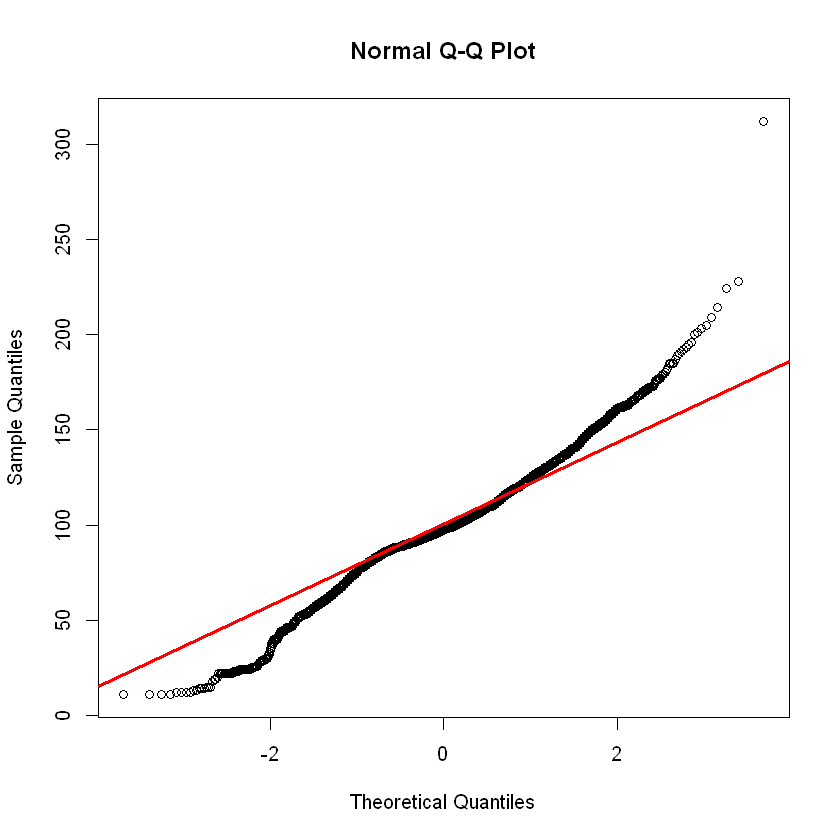

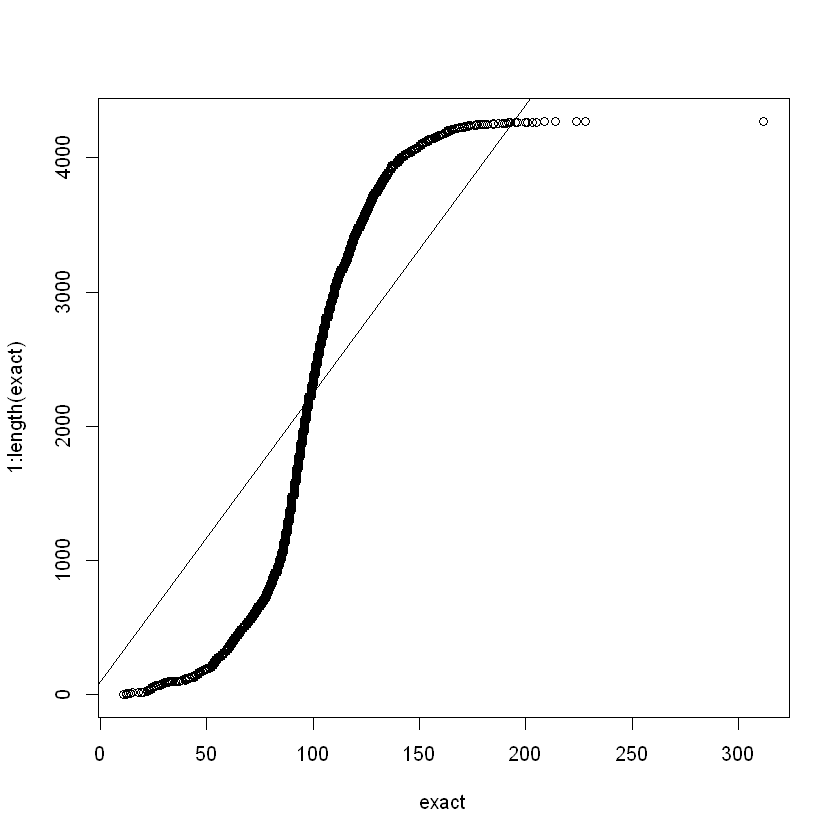

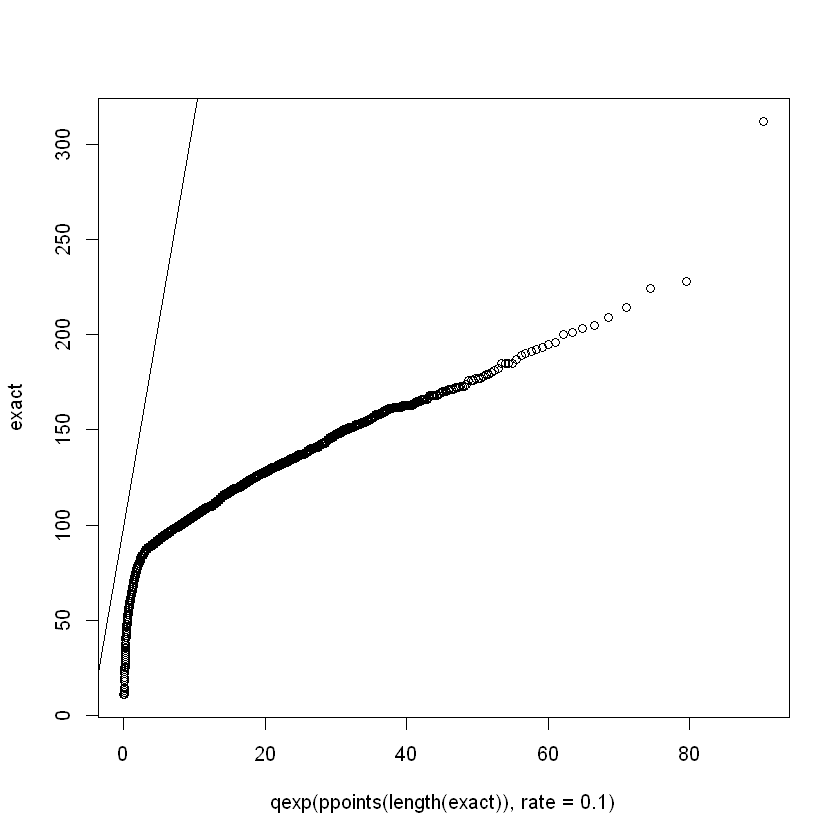

In [2]:
#lets start with duration as lots of it can be represented as ratio variable
duration <- nd$duration

# taking only those cells where the runtime is given
exact <- c()
for (i in duration){
    i <- strsplit(i," ")
    if (as.numeric(i[[1]][1])>10){
         exact <- c(exact,as.numeric(i[[1]][1]))
    }
}


# Test duration sample for normal distribution by plottint qq plot
qqnorm(exact)
qqline(exact, col='red',lwd=3)

# Test duration sample for uniform distribution by plottint qq plot
qqplot(exact,1:length(exact))
qqline(exact)

# Test duration sample for exponential distribution by plottint qq plot
qqplot(qexp(ppoints(length(exact)), rate = 0.1), exact)
qqline(exact)

[1] "IQR = 29.000"

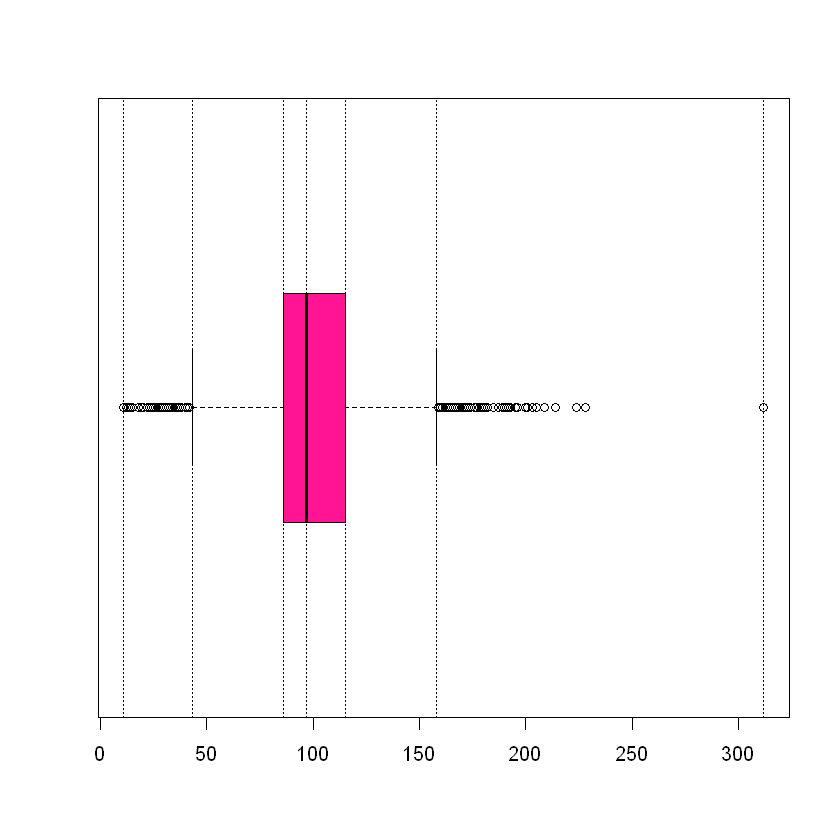

In [3]:
# see box plot to know if outliers are the reason which are preventing us from finding the distribution of the sample
boxplot(exact, horizontal=TRUE, col='deeppink')

# Plot the sample min, max, median and quartiles
# This is the "five-number summary"
abline(v=min(exact), lty=3)
abline(v=quantile(exact, 0.25), lty=3)
abline(v=quantile(exact, 0.5), lty=3)
abline(v=quantile(exact, 0.75), lty=3)
abline(v=max(exact), lty=3)

# Find interquartile range
iqr <- quantile(exact, 0.75) - quantile(exact, 0.25)
sprintf('IQR = %.3f',as.double(iqr))

# Plot the whiskers
whisker_left  <- min(exact[exact >= quantile(exact, 0.25) - 1.5*iqr])
whisker_right <- max(exact[exact <= quantile(exact, 0.75) + 1.5*iqr])
abline(v=whisker_left, lty=3)
abline(v=whisker_right, lty=3)

lower_bound <- quantile(exact, 0.25) - 1.5*iqr
upper_bound <- quantile(exact, 0.75) - 1.5*iqr

# find the outliers
idxL <- exact < lower_bound
idxR <- exact > upper_bound
outliers <- exact[idxL|idxR]

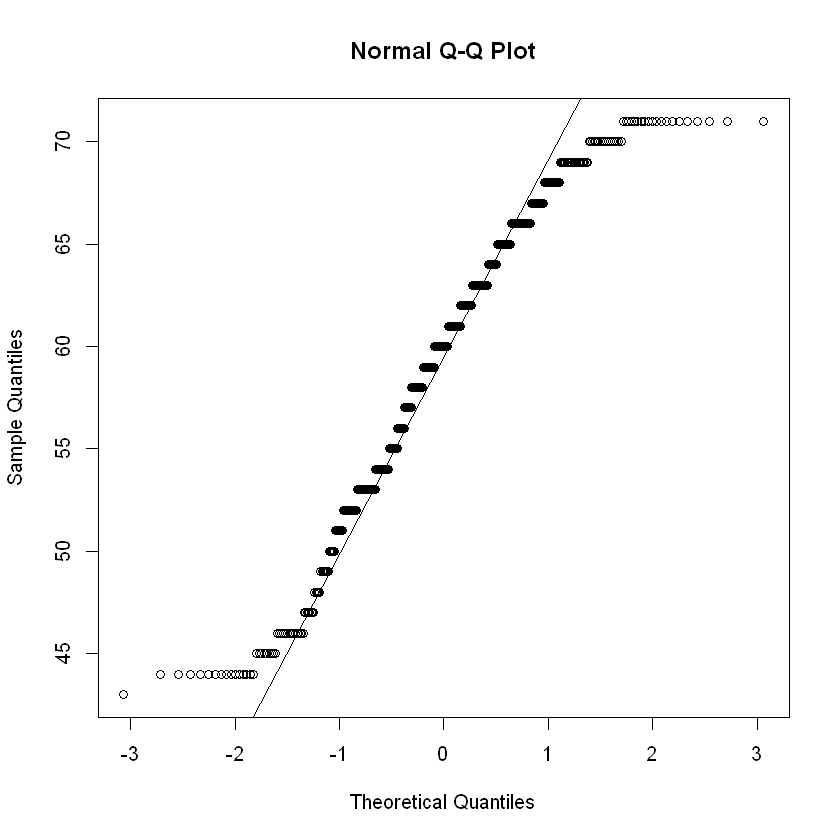

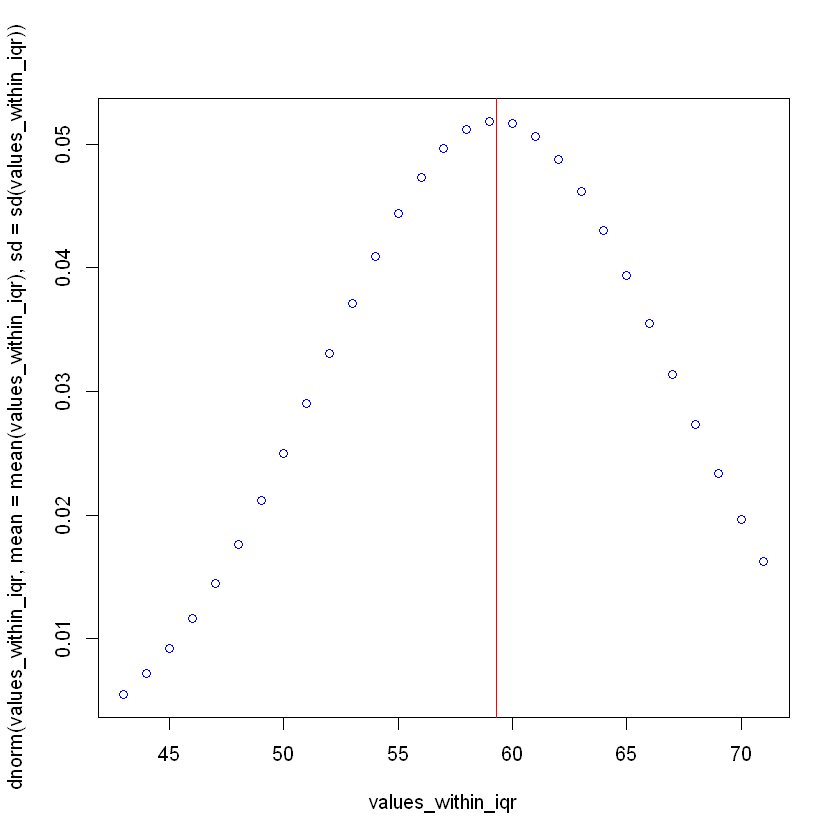

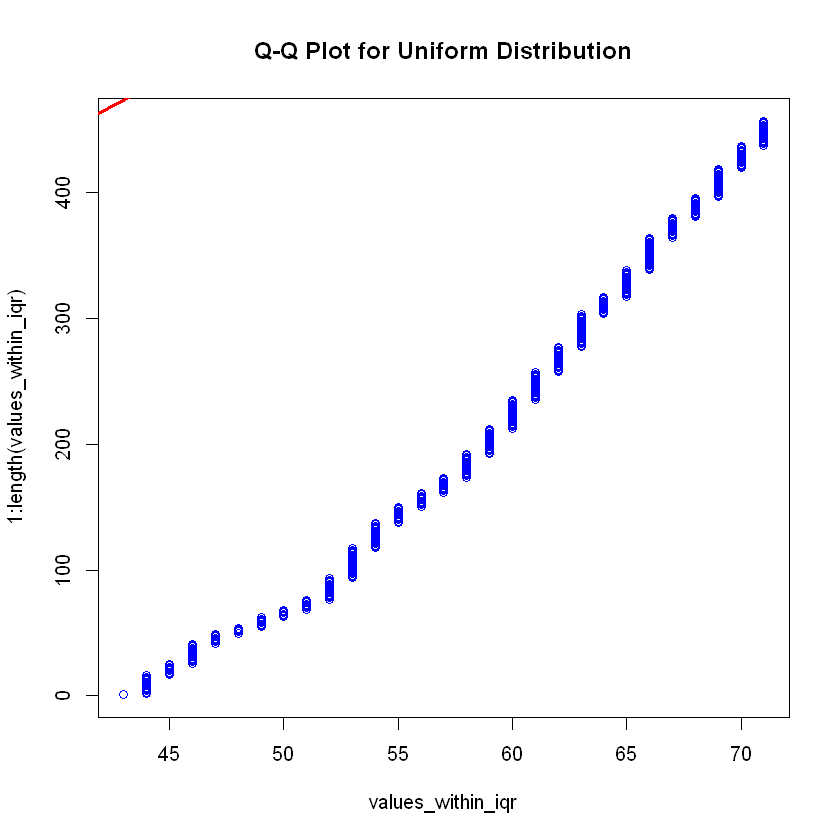

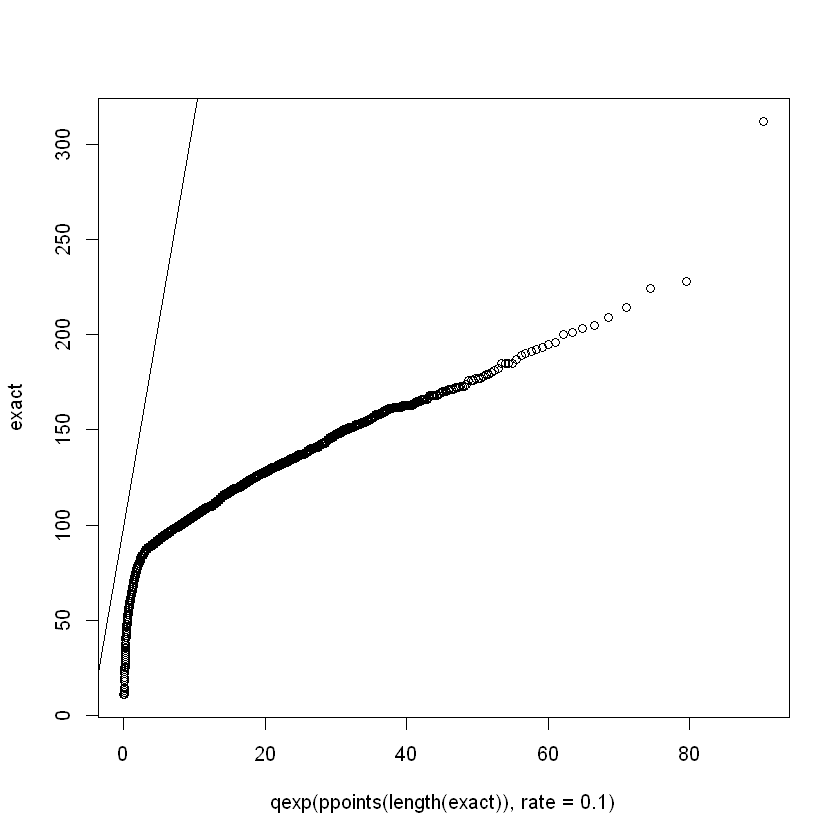

In [4]:
# since there are too many outliers we use the sample which is within interquartile range
values_within_iqr <- exact[exact >= lower_bound & exact <= upper_bound]

# now we plot qq plots the interquartile sample 
# first for normal distribution
qqnorm(values_within_iqr)
qqline(values_within_iqr)

# plot the sample against its normal distribution densities 
plot(values_within_iqr,dnorm(values_within_iqr,mean=mean(values_within_iqr),sd=sd(values_within_iqr)),col="blue")
abline(v=mean(values_within_iqr), col="red")

# second for uniform distribution
qqplot(values_within_iqr, 1:length(values_within_iqr), main = "Q-Q Plot for Uniform Distribution", col = "blue")
qqline(values_within_iqr, col='red',lwd=3)

# third for exponential distribution
qqplot(qexp(ppoints(length(exact)), rate = 0.1), exact)
qqline(exact)

In [5]:
# calculate BIAS and Mean squared error of the sample with estimator as mew

mu <- mean(values_within_iqr)
sigma <- sd(values_within_iqr)
npts  <- 10

# set expt parameters and reserve memory
nreps <- 100
bias <- c()
mse  <- c()

# simulate the sampling to apply the central limit theorem 
for (rep in 1:nreps) {
    pts <- sample(values_within_iqr,npts)
    xbar <- mean(pts) # sample mean
    bias <- c(bias, xbar - mu)
    mse  <- c(mse,(xbar - mu)**2)
}

# print the means of bias and mse of the simulation 
mean_bias <- mean(bias)
print(sprintf("Mean Bias : %.3f", mean_bias))

sd_bias <- sd(bias)
print(sprintf("SD Bias : %.3f", sd_bias))

print(sprintf("Mean Mean squared error : %.3f", mean(mse)))
print(sprintf("SD Mean squared error : %.3f", sd(mse)))


[1] "Mean Bias : -0.203"
[1] "SD Bias : 2.341"
[1] "Mean Mean squared error : 5.466"
[1] "SD Mean squared error : 6.918"


Warning message:
"Removed 11 rows containing non-finite values (`stat_count()`)."


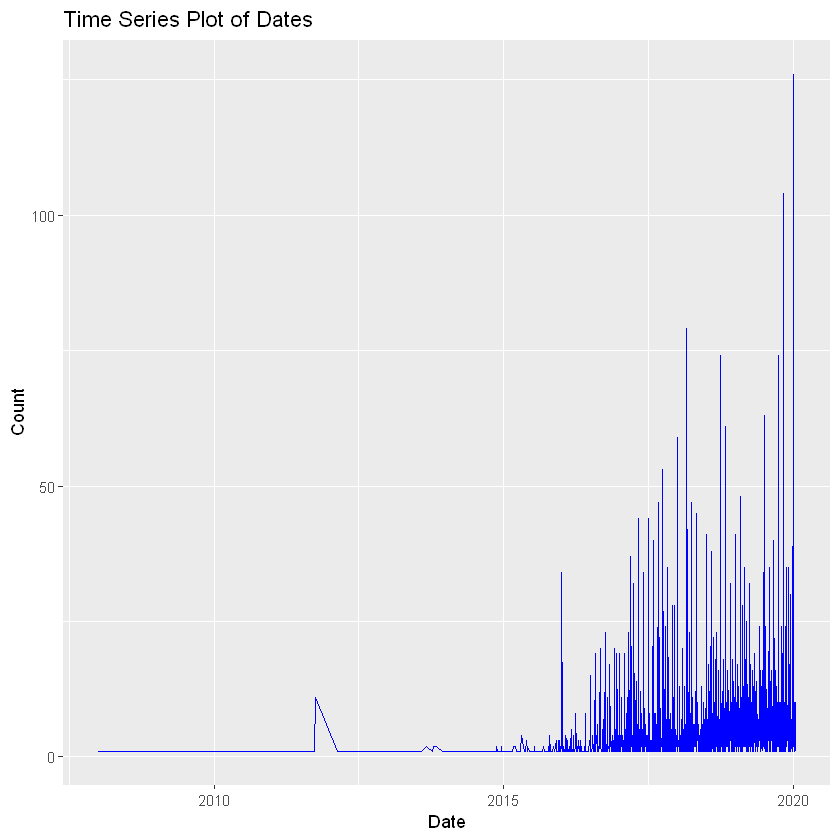

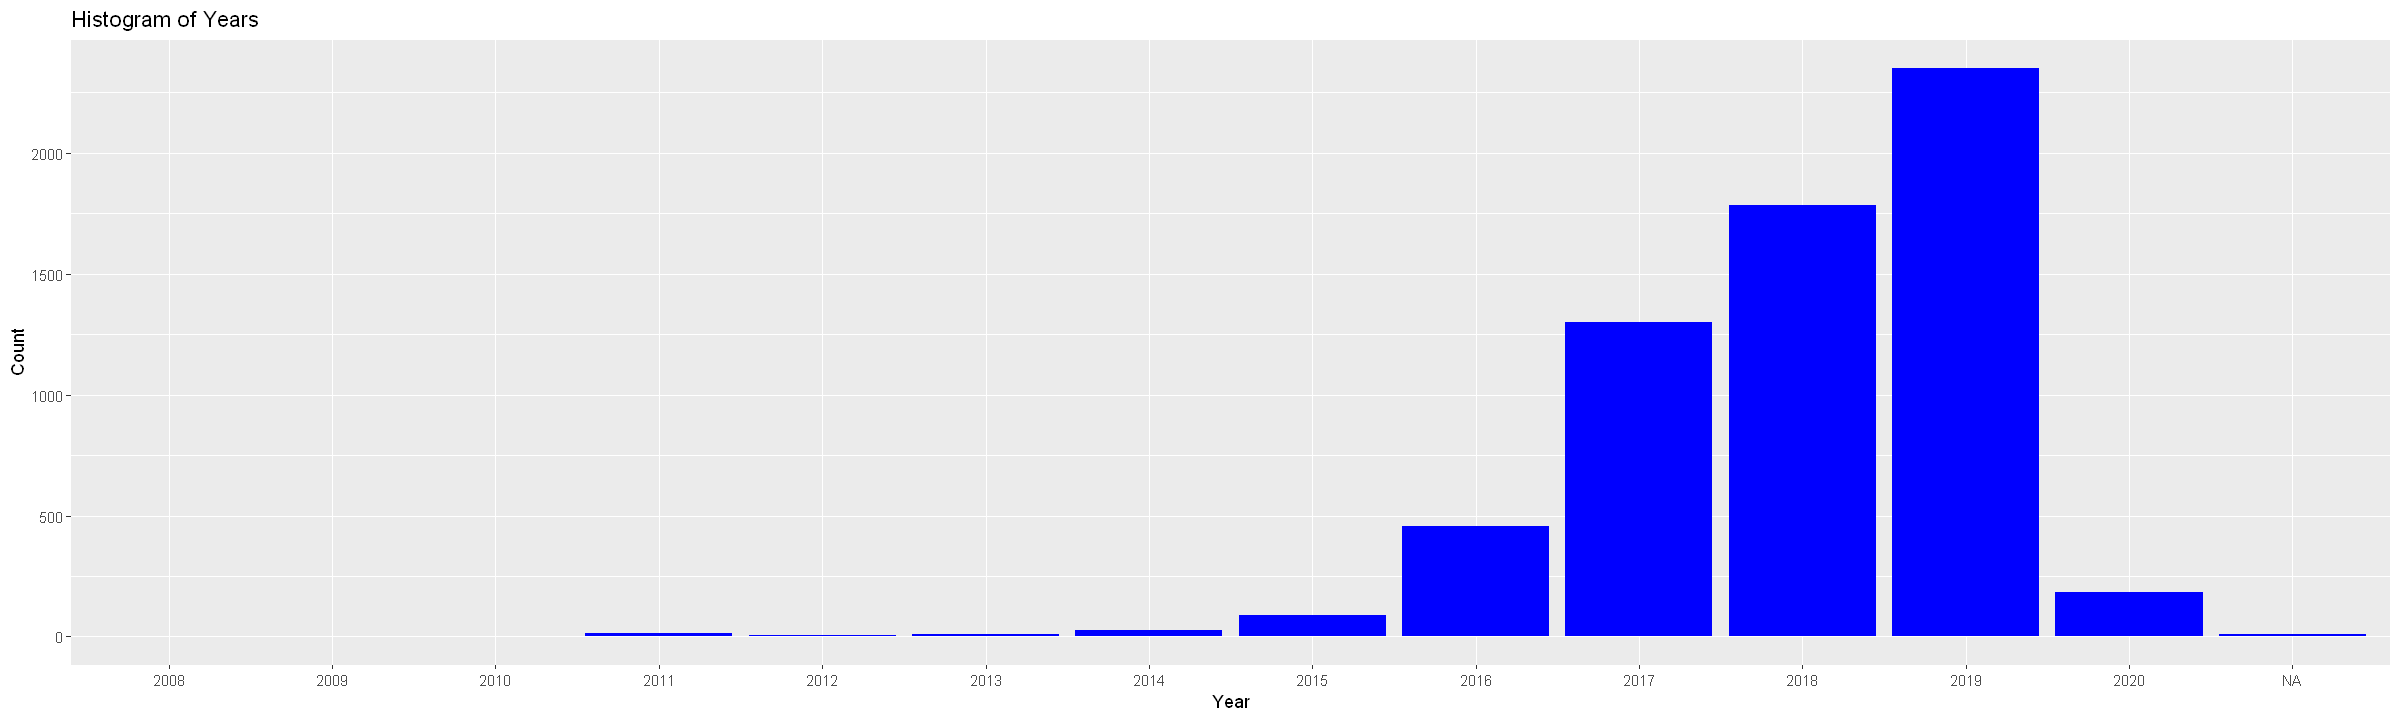

In [6]:
# next we explore the coulumn named as date_added 
date_data <- nd$date_added
date_data <- mdy(date_data)

# plot timeseries to see trends in data 
ggplot(data = data.frame(date = date_data), aes(x = date)) +
  geom_line(stat = "count", color = "blue") +
  labs(title = "Time Series Plot of Dates", x = "Date", y = "Count")
years <- format(date_data, "%Y")

# plot the histograms of years to see the new content volume
options(repr.plot.width=20, repr.plot.height=6)
ggplot(data = data.frame(year = years), aes(x = year)) +
  geom_bar(stat = "count", fill = "blue") +
  labs(title = "Histogram of Years", x = "Year", y = "Count")

Warning message:
"Removed 11 rows containing non-finite values (`stat_count()`)."


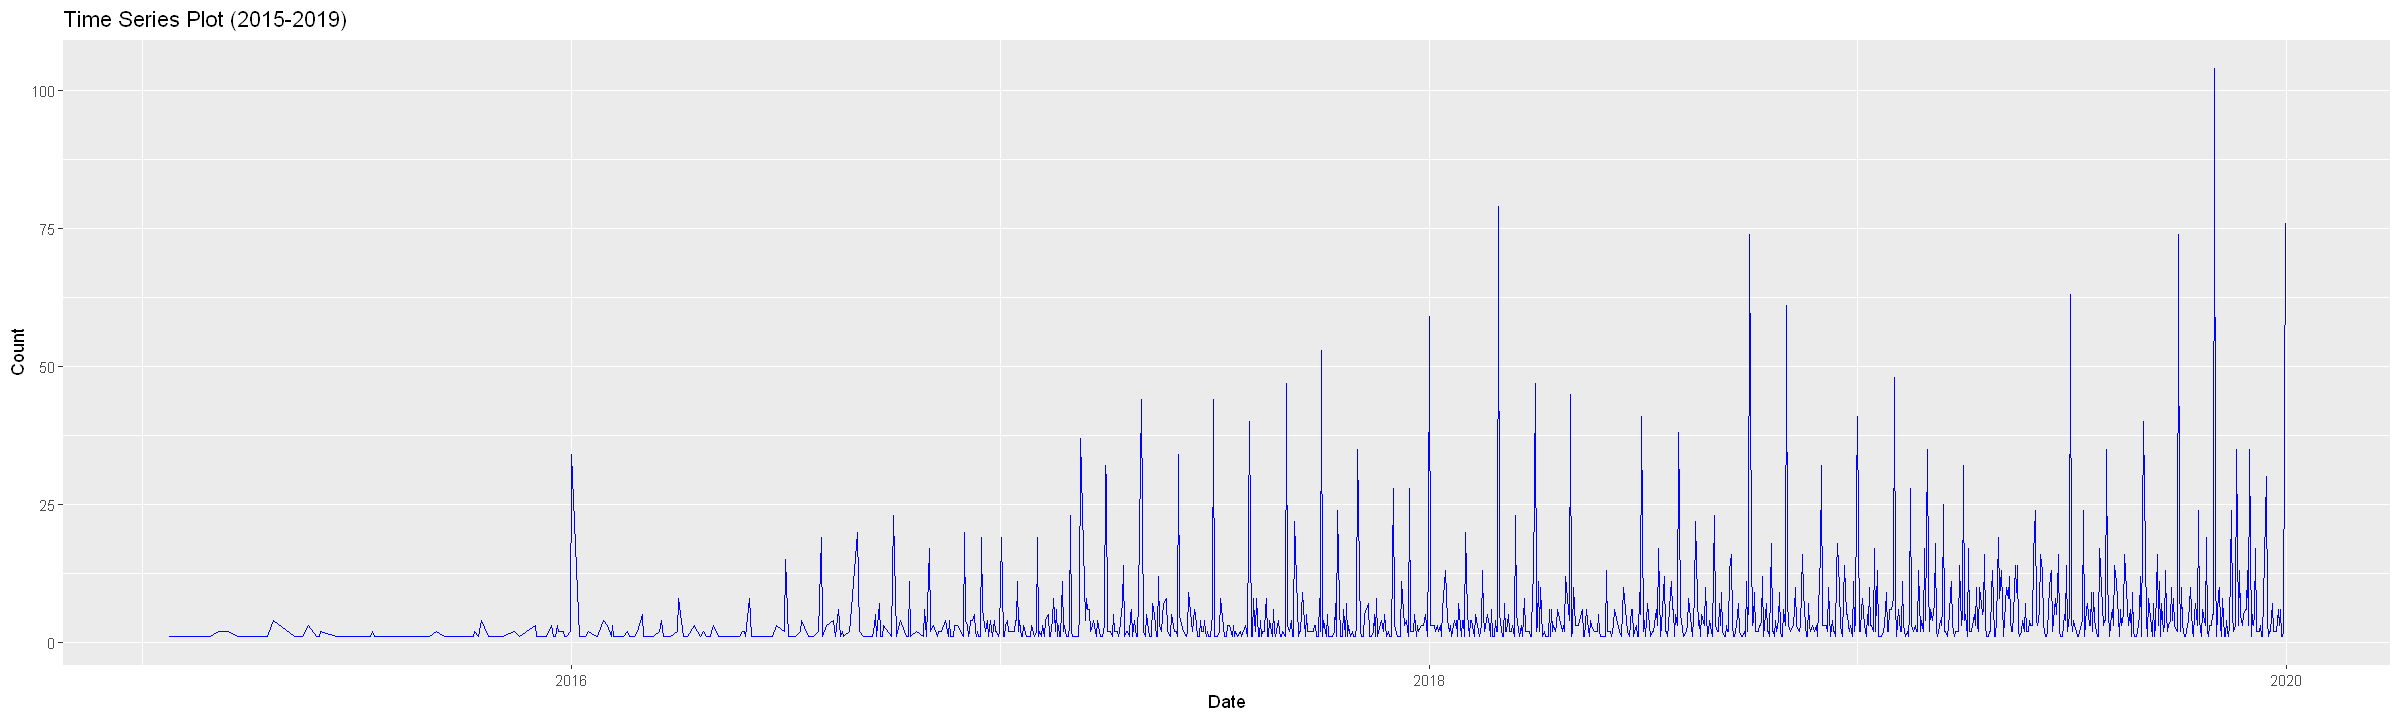

In [7]:
# Filter data for the years 2015 to 2019 since these years marked the exponetial growth of content on netflix 
filtered_data <- date_data[date_data >= as.Date("2015-01-01") & date_data <= as.Date("2019-12-31")]
options(repr.plot.width=20, repr.plot.height=6)

# Create a time series of these years to take a better look at it
ggplot(data = data.frame(date = filtered_data), aes(x = date)) +
  geom_line(stat = "count", color = "blue") +
  labs(title = "Time Series Plot (2015-2019)", x = "Date", y = "Count")


In [8]:
# there is a trend in date_added column it says that amount of new programs on the netflix is increasing
# next move on to categorical data


  Movie TV Show 
   4265    1969 


   Movie  TV Show 
68.41514 31.58486 

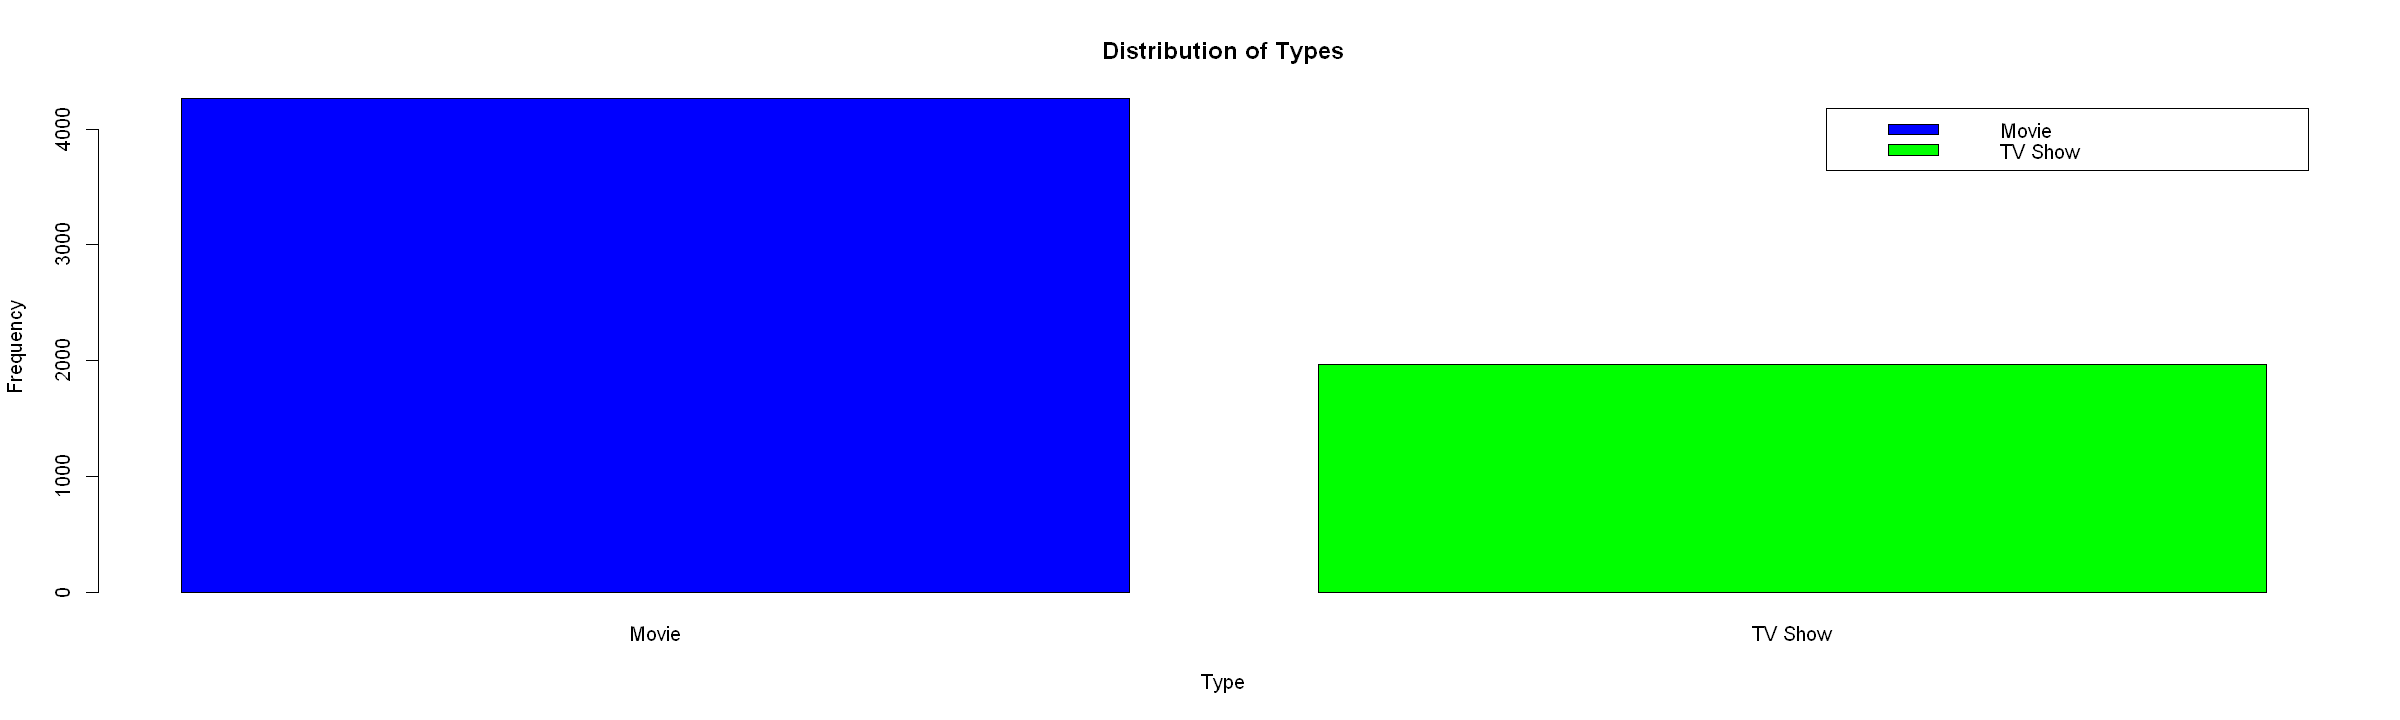

In [9]:
# Next we explore the type column, it is categorical
table(nd$type)

# the distribution
barplot(table(nd$type), main = "Distribution of Types", xlab = "Type", ylab = "Frequency", col = c("blue", "green"), legend.text = TRUE)

# Percentage distribution
prop.table(table(nd$type)) * 100

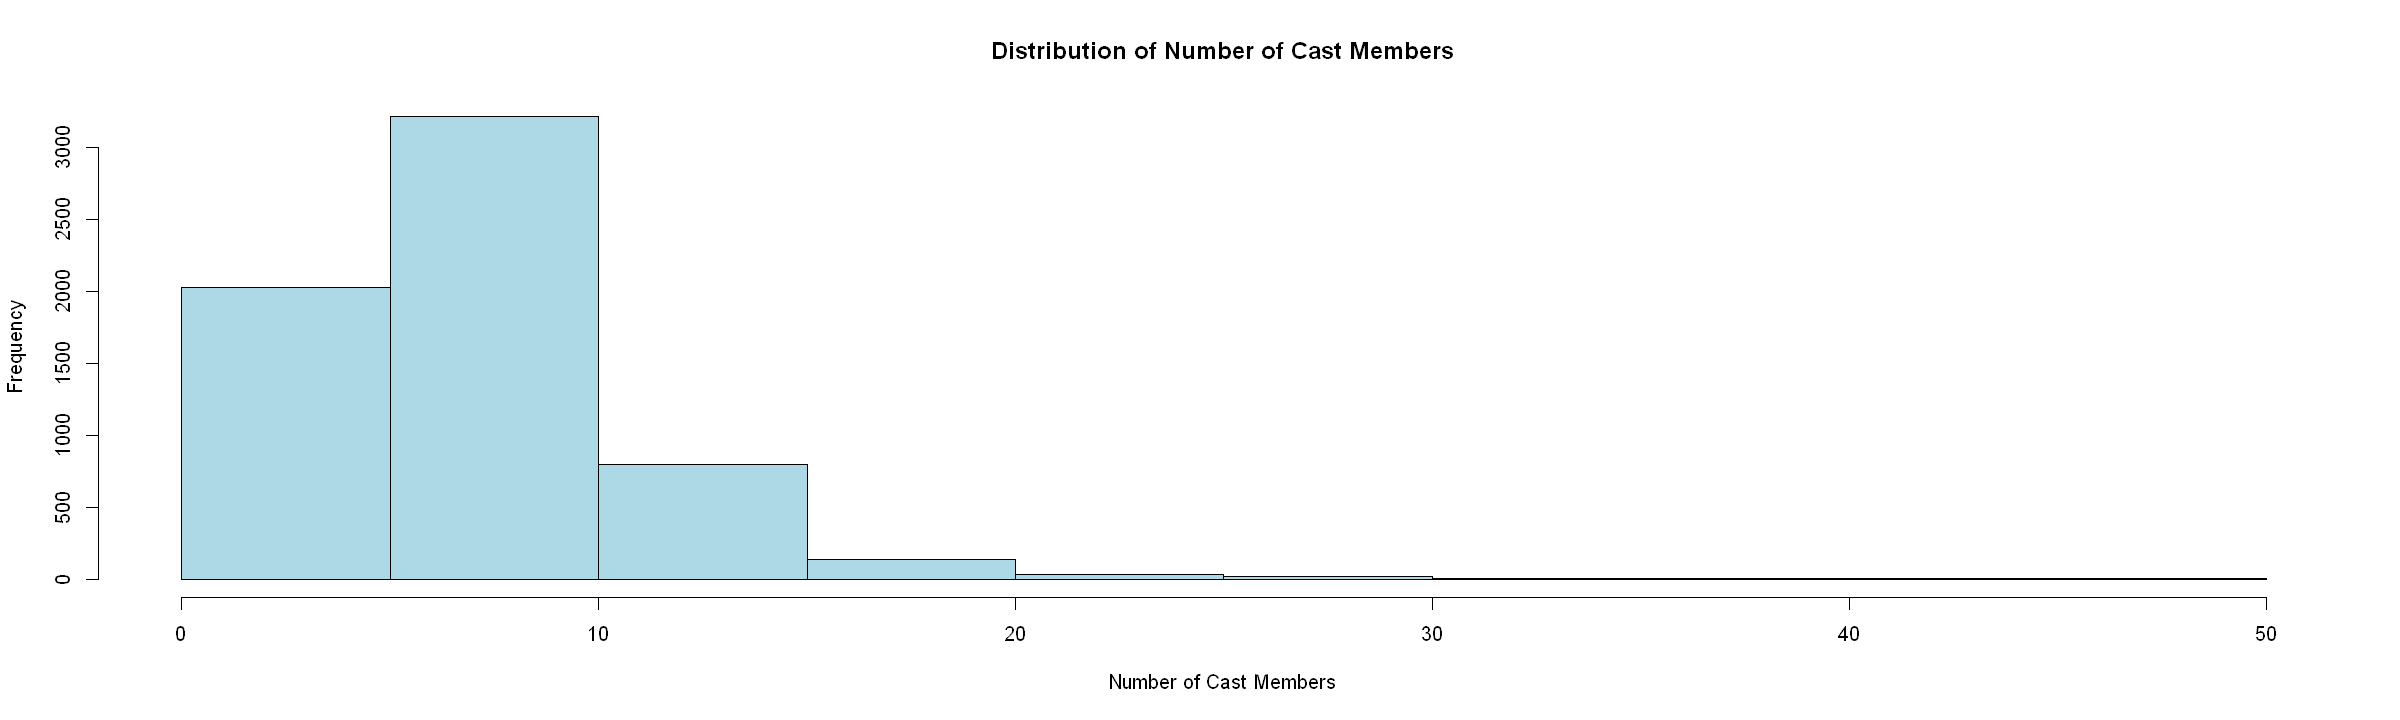

In [10]:
# distribution of the number of cast members
hist(lengths(strsplit(nd$cast, ", ")), main = "Distribution of Number of Cast Members", xlab = "Number of Cast Members", col = "lightblue")

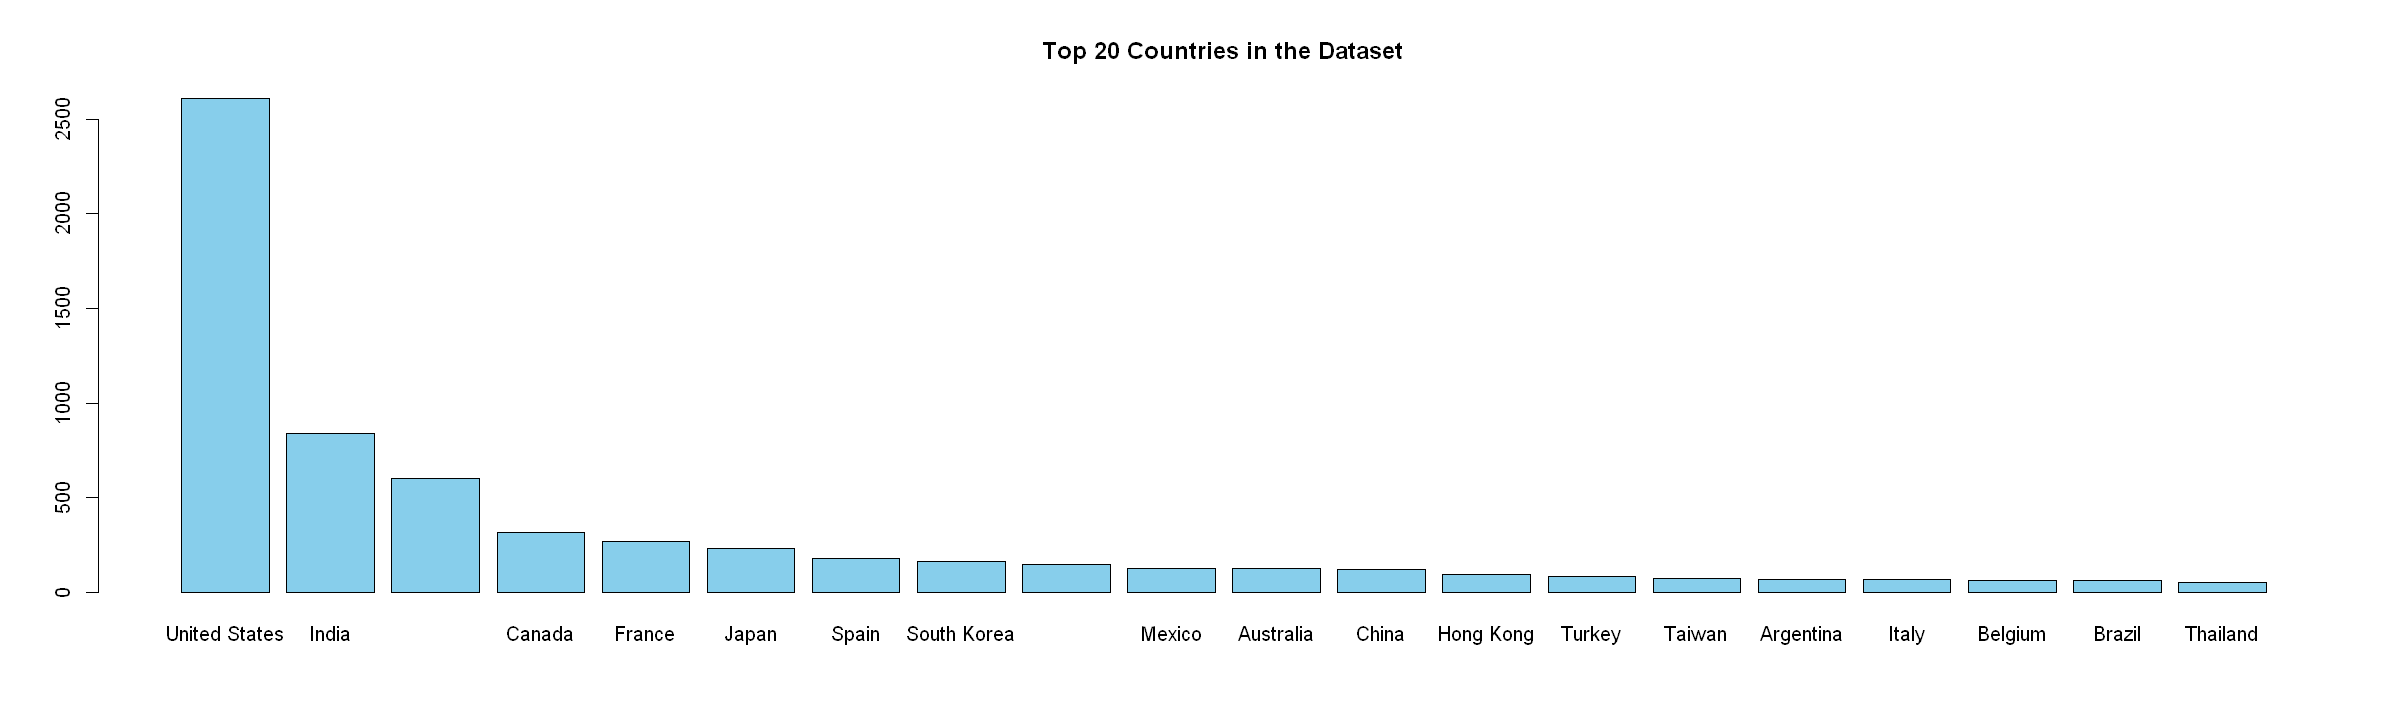

In [11]:
# seeing countries by the volumne of content available to those on netflix
individual_countries <- unlist(strsplit(nd$country, ", "))
barplot(sort(table(individual_countries), decreasing = TRUE)[1:20], main = "Top 20 Countries in the Dataset", col = "skyblue")

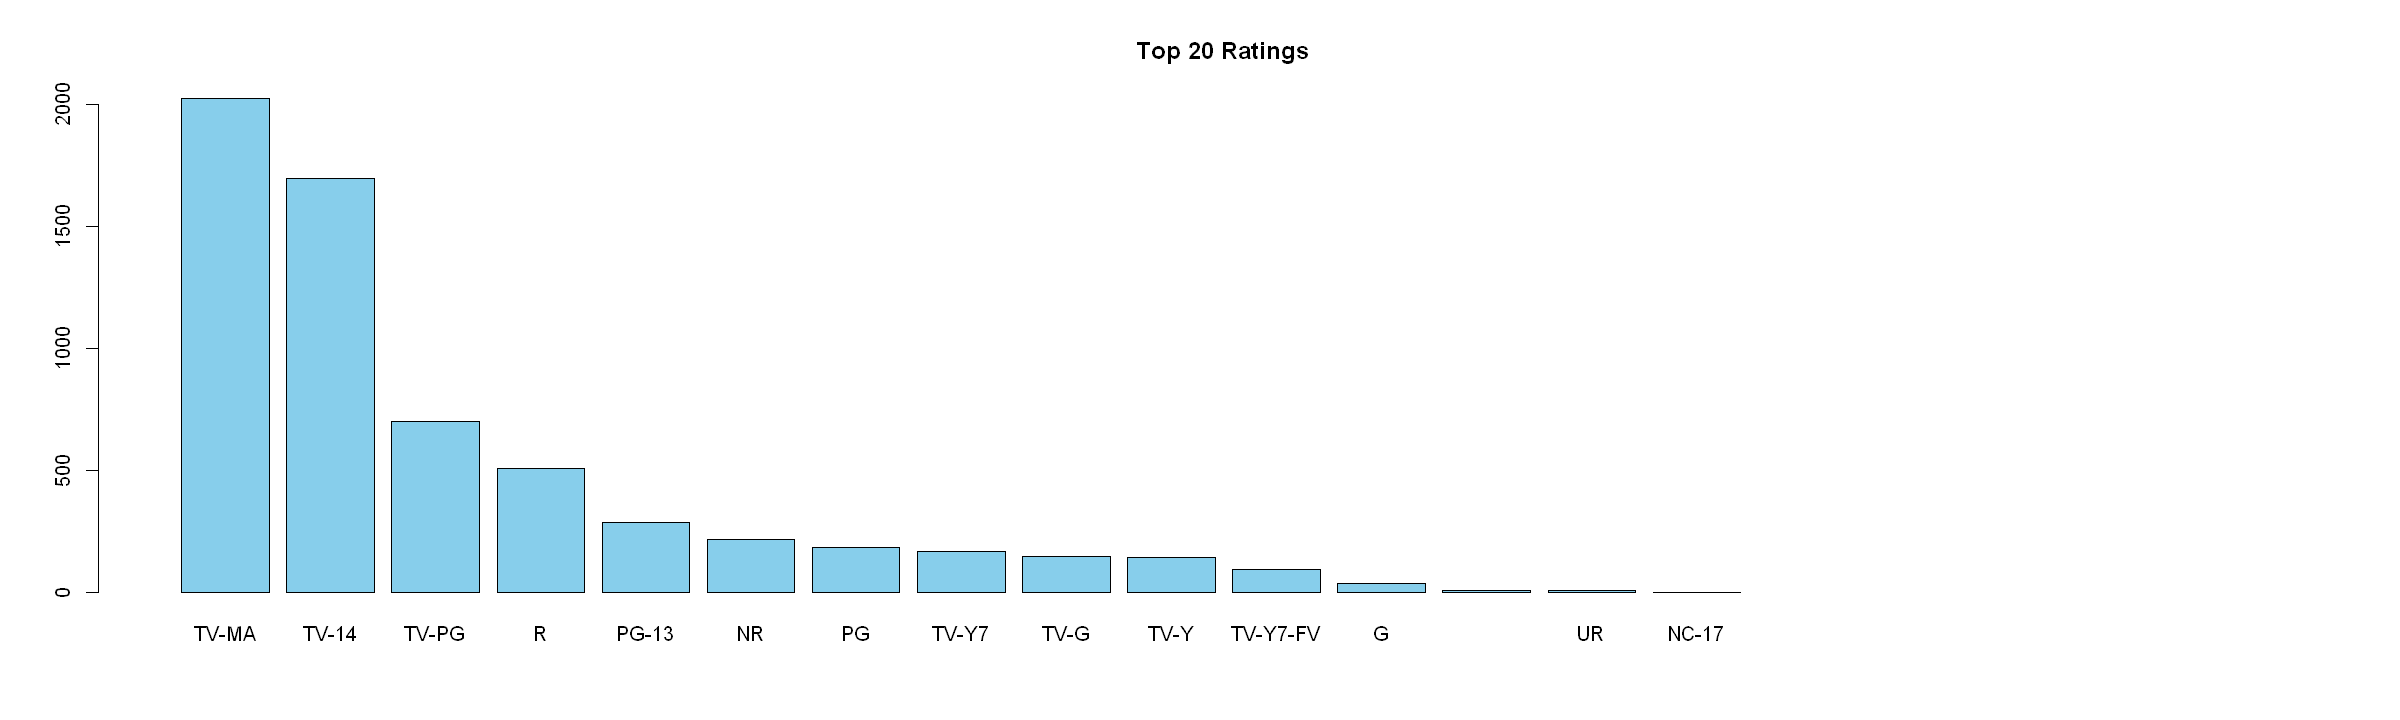

In [12]:
# checking the ratings of the content
ratings <- unlist(nd$rating)
barplot(sort(table(ratings), decreasing = TRUE)[1:20], main = "Top 20 Ratings", col = "skyblue")

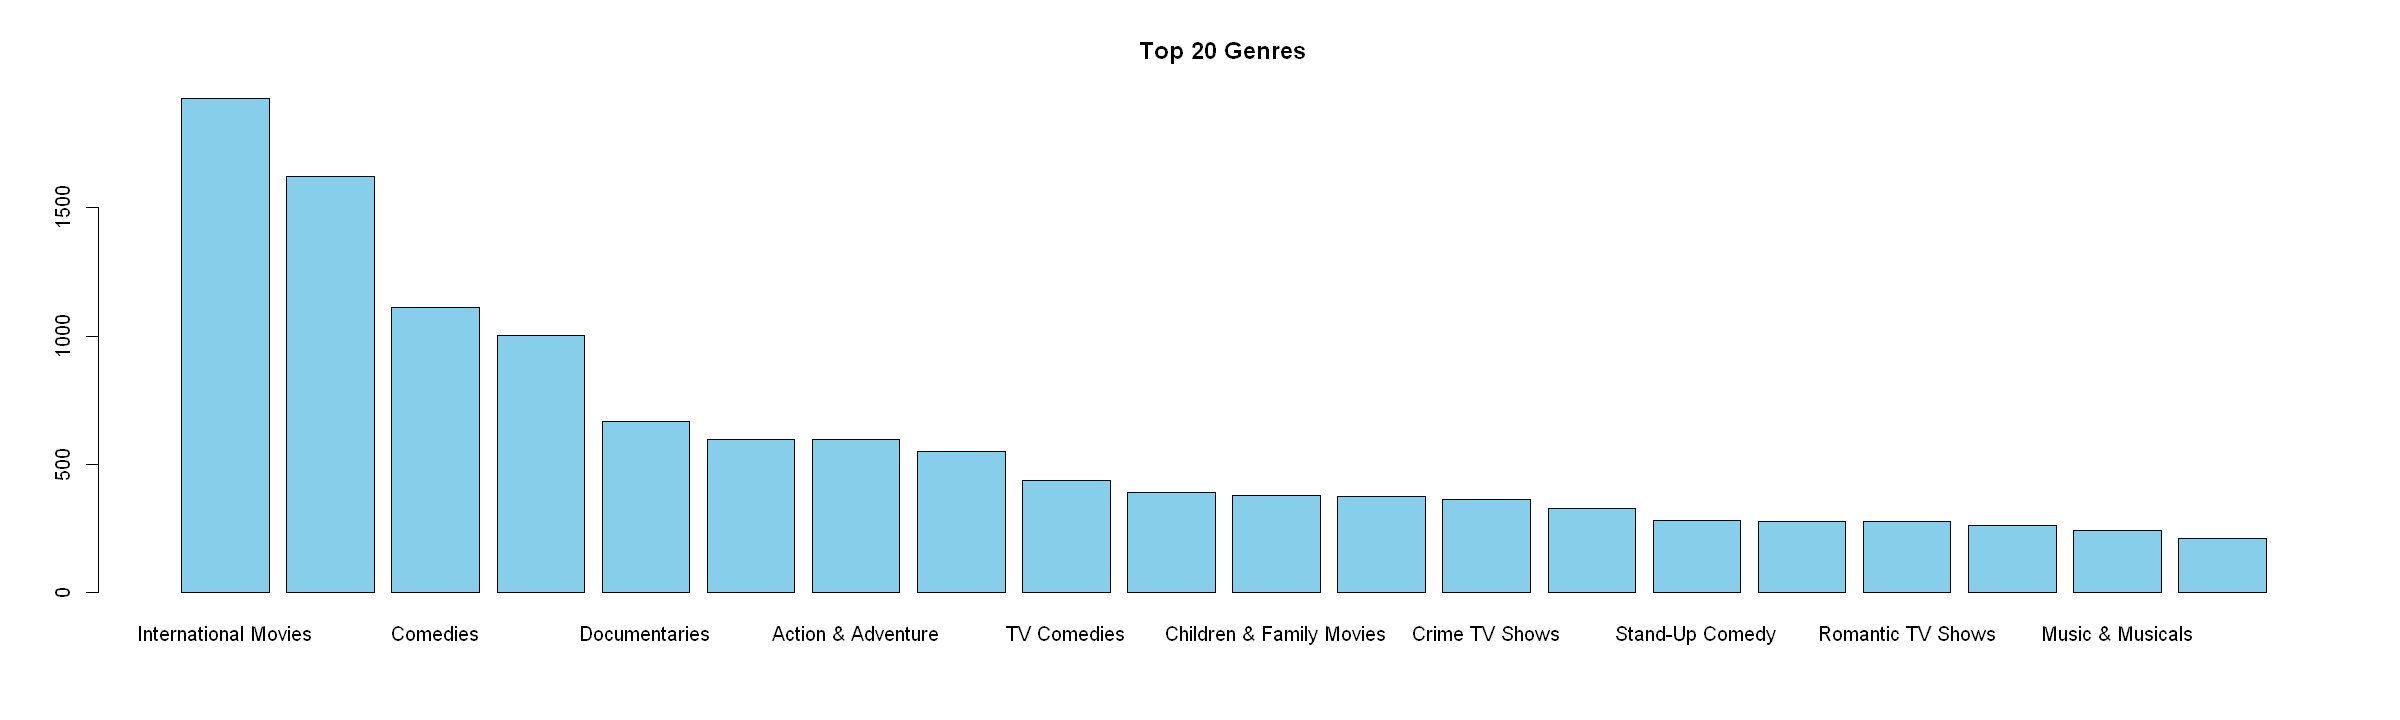

In [13]:
# checking the volumne of content by its genre
genre <- unlist(strsplit(nd$listed_in, ", "))
barplot(sort(table(genre), decreasing = TRUE)[1:20], main = "Top 20 Genres", col = "skyblue")

Warning message:
"Use of `nd$rating` is discouraged.
ℹ Use `rating` instead."
Warning message:
"Use of `nd$type` is discouraged.
ℹ Use `type` instead."


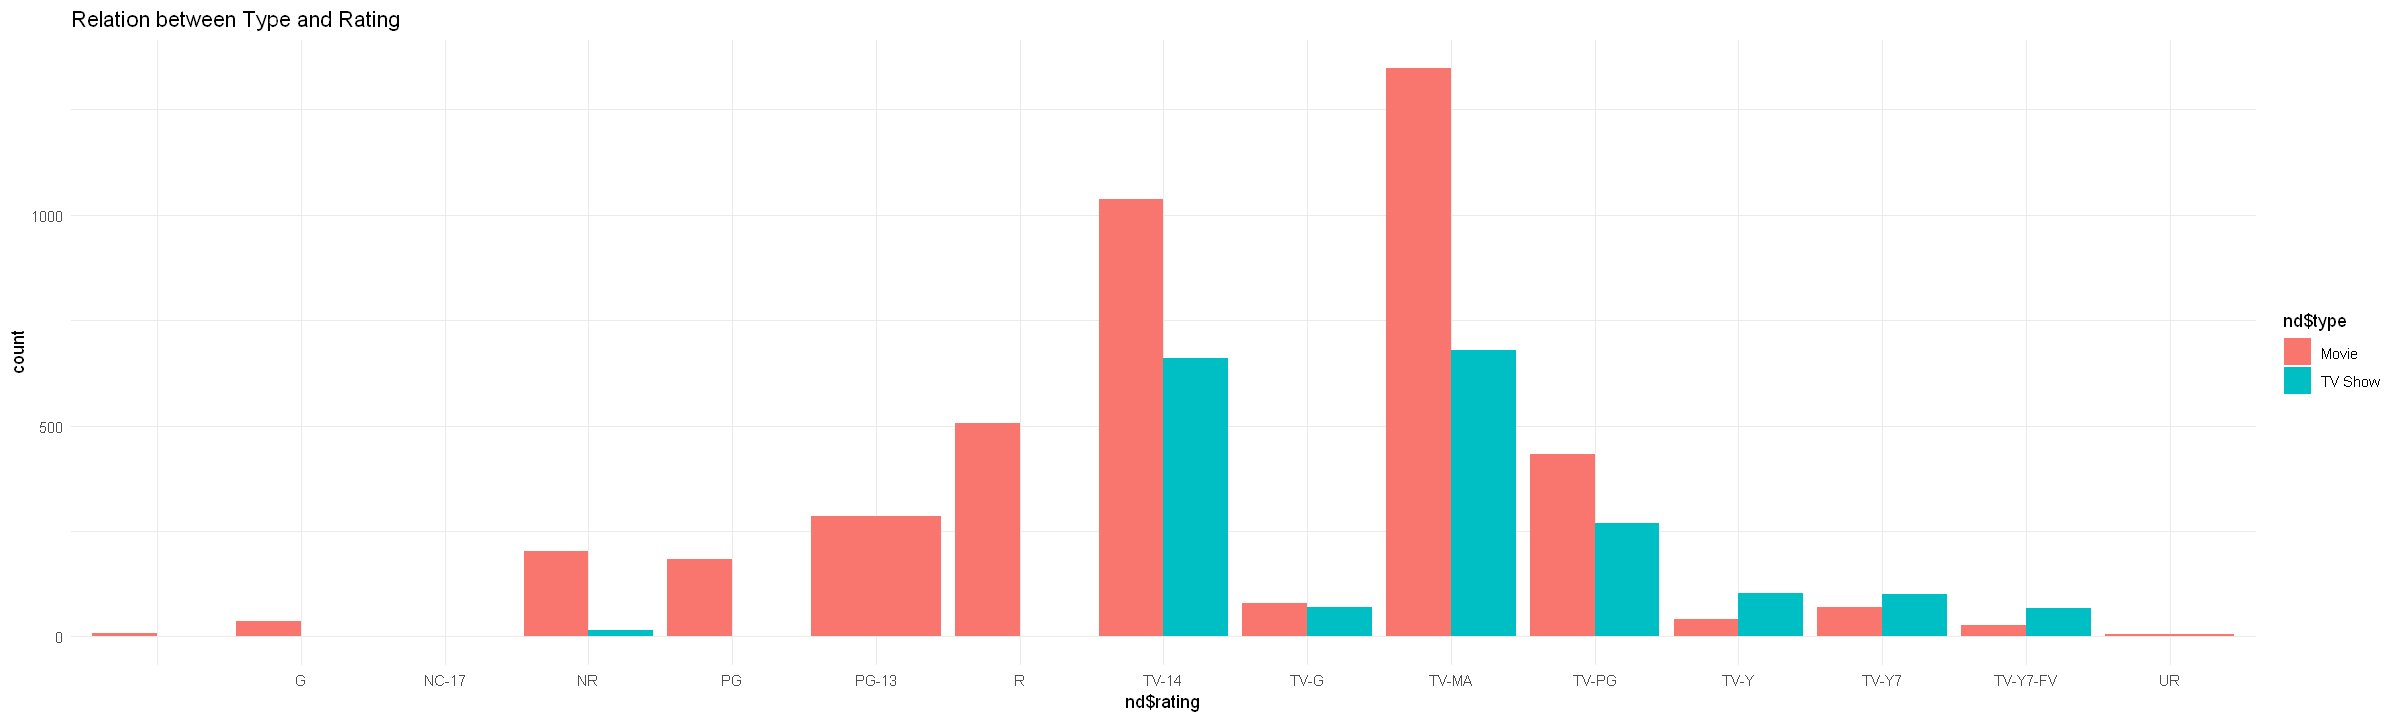

In [14]:
# checking how much type is distributed over by the ratings
ggplot(nd, aes(x = nd$rating, fill = nd$type)) +
  geom_bar(position = 'dodge') +
  labs(title = 'Relation between Type and Rating') +
  theme_minimal()

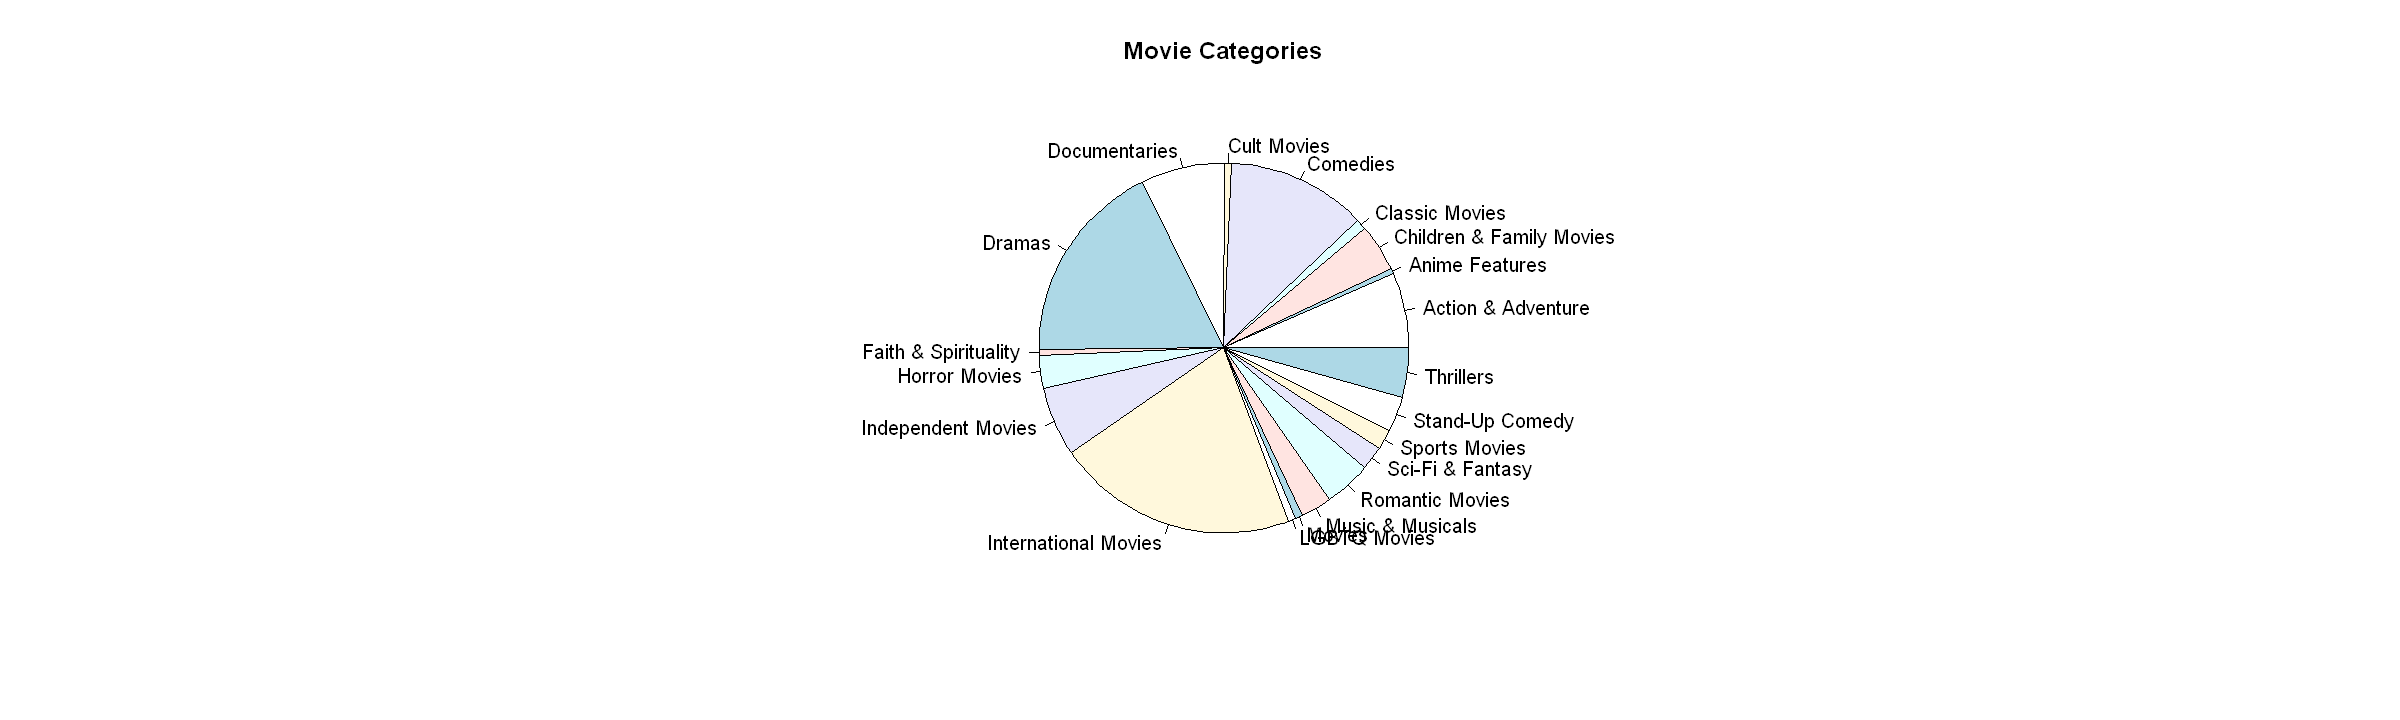

In [15]:
# pie chart showing the movies categories
movies_data <- subset(nd, type == "Movie")
category_counts <- table(unlist(strsplit(movies_data$listed_in, ", ")))
pie(category_counts, labels = names(category_counts), main = "Movie Categories")